In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Feature Engineering**

It is a process of using domain knowledge to extract features from raw data. These features can be used to improve the performance of machine learning algorithm.

It is classified in the following ways.

1.   Feature transformation.
    
    Missing value imputation.

    Handling categorical features.

    outlier detection.

    feature scaling.
2.   Feature construction.
3.   Feature selection.
4.   Feature extraction.

### Where to apply standardization by default

Apply standardization where ever you calculate distance. like euclidian distance.
1. K-means - Use the Euclidean distance measure
2. Principal component analysis - Measure the distance between pairs of samples and these distances are influenced by the measurement units
3. K-Nearest Neighbors - try to achieve feature with maximum variance
4. Artificial neural networks - apply gradient descent
5. Gradient Descent - Theta calculation becomes faster after feature scaling and the learning rate in the update equation of stochastic gradient descent is the same for every parameter.

### Where not to 
 Decision trees, Random forest, Gradient boost, XGBoost, etc. 

### Feature scaling

It is a technique to standardize the independent features present in the data in a fixed range.

## feature scaling types 
Standardization

Normalization
    MinMax scaler
    Robust scaler
    etc

Standardization 

also called as Z-score normalization

formula

xi' = xi-mean/standard deviation

After standardization always the mean of xi' will be mean = 0 and SD = 1


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colabnotebooks/Social_Network_Ads.csv')

In [5]:
df = df.iloc[:,2:]

In [6]:
df.sample(5)

,Age,EstimatedSalary,Purchased
152,31,76000,0
338,38,55000,0
316,54,104000,1
6,27,84000,0
361,53,34000,1


In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased',axis=1),df['Purchased'],test_size=0.3,random_state=0)

In [8]:
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [11]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

Because the data is stored in a numpy array we need to convert it to a dataframe so that we can work on it.

In [12]:
X_train_scaled=pd.DataFrame(X_train_scaled,columns=X_train.columns)
X_test_scaled=pd.DataFrame(X_test_scaled,columns=X_test.columns)

In [13]:
X_train_scaled, X_test_scaled

(          Age  EstimatedSalary
 0   -1.163172        -1.584970
 1    2.170181         0.930987
 2    0.013305         1.220177
 3    0.209385         1.075582
 4    0.405465        -0.486047
 ..        ...              ...
 275  0.993704        -1.151185
 276 -0.869053        -0.775237
 277 -0.182774        -0.514966
 278 -1.065133        -0.457127
 279 -1.163172         1.393691
 
 [280 rows x 2 columns],
           Age  EstimatedSalary
 0   -0.771013         0.497201
 1    0.013305        -0.572804
 2   -0.280814         0.150172
 3   -0.771013         0.265849
 4   -0.280814        -0.572804
 ..        ...              ...
 115  1.091743        -0.139018
 116  0.699584         1.769639
 117 -0.672973         0.555039
 118  0.797624         0.352606
 119  0.895664        -0.543885
 
 [120 rows x 2 columns])

In [14]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


As you can see the data is not altered in X_train that's why their metrics are variable as you can see the mean is 37.9 and std is 10.2 which makes it difficult for feature construction.

After the standardized scaling the results are as below

The mean is zero and std is one, this is the criteria to achieve in standardization scaling, that we have achieved with this dataset.

In [15]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


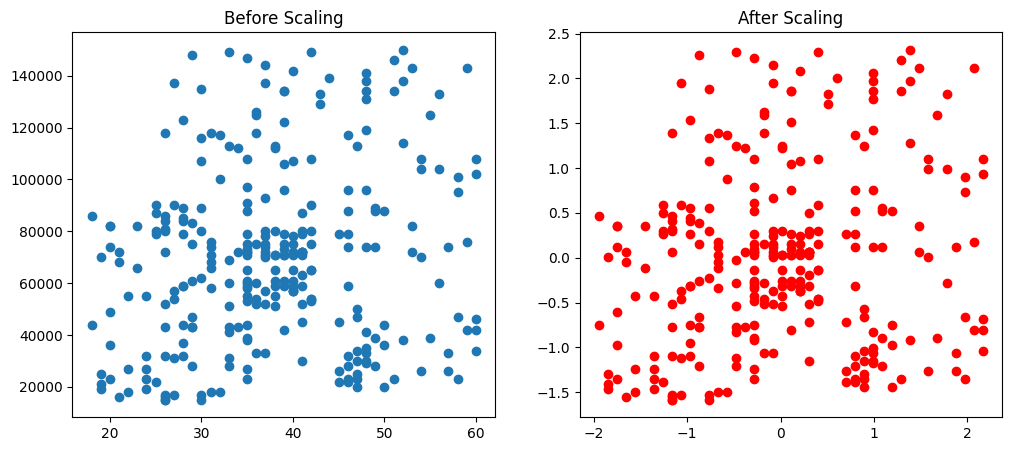

In [16]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

This scatter plot shows that we have achieved mean centering and std restrition

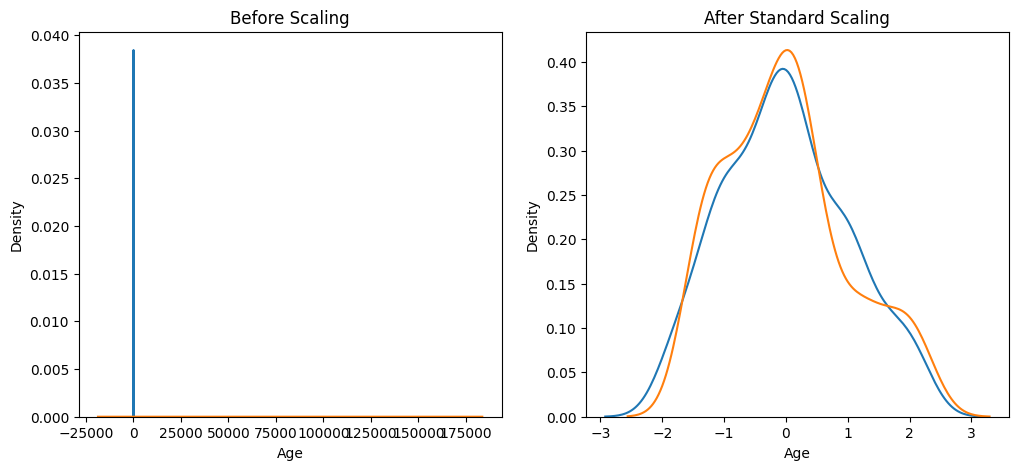

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

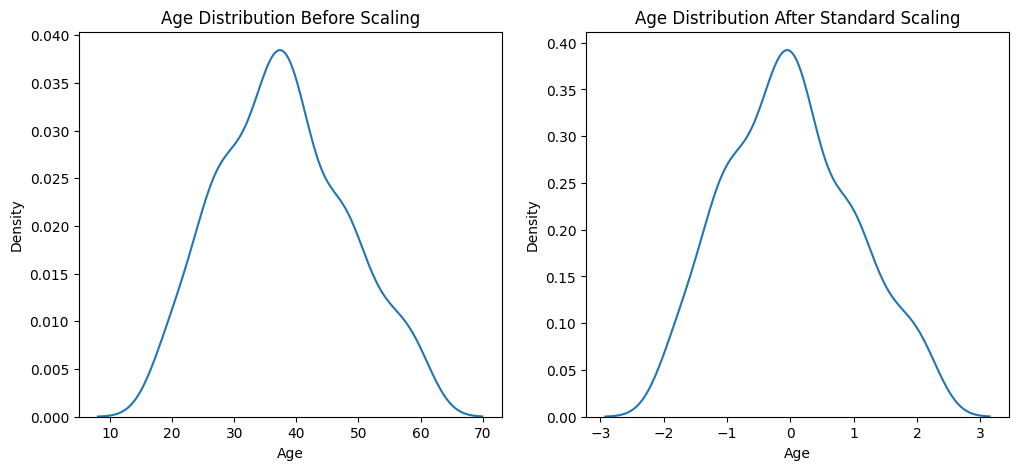

In [18]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Age Distribution Before Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

# after scaling
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
plt.show()

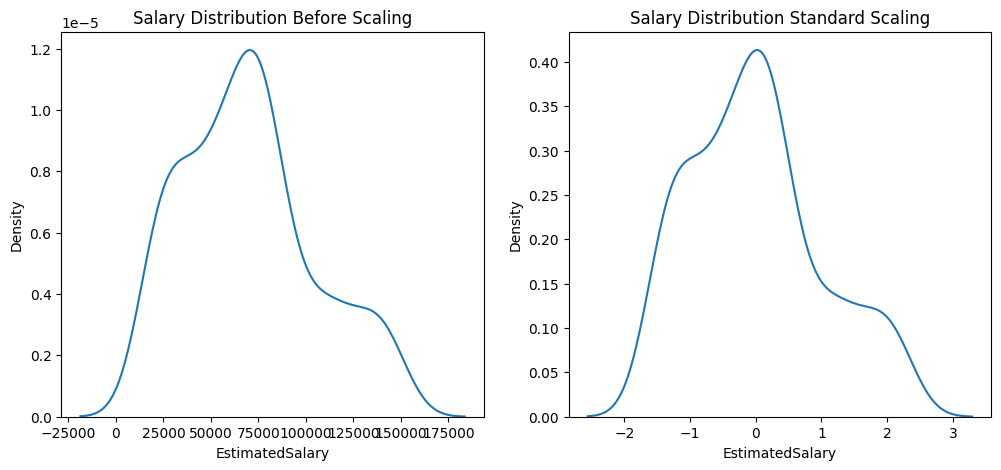

In [19]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [22]:
lr.fit(X_train,Y_train)
lr_scaled.fit(X_train_scaled,Y_train)

LogisticRegression()

In [23]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [28]:
dt.fit(X_train,Y_train)
dt_scaled.fit(X_train_scaled,Y_train)


DecisionTreeClassifier()

In [29]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [30]:
print("Actual",accuracy_score(Y_test,y_pred))
print("Scaled",accuracy_score(Y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875


In [31]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


Outlier addition to understand the effect of an outlier on a standardized data

In [32]:
df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)
df

<ipython-input-32-673067db84ea>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(pd.DataFrame({'Age':[5,90,95],'EstimatedSalary':[1000,250000,350000],'Purchased':[0,1,1]}),ignore_index=True)


,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
398,36,33000,0
399,49,36000,1
400,5,1000,0
401,90,250000,1


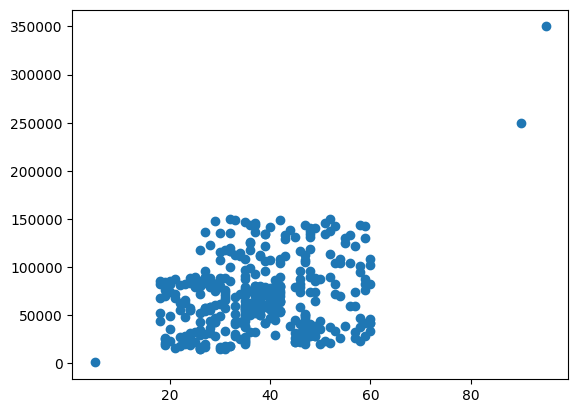

In [33]:
plt.scatter(df['Age'], df['EstimatedSalary'])

In [34]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

X_train.shape, X_test.shape

((282, 2), (121, 2))

In [35]:
scaler = StandardScaler()

scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [36]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

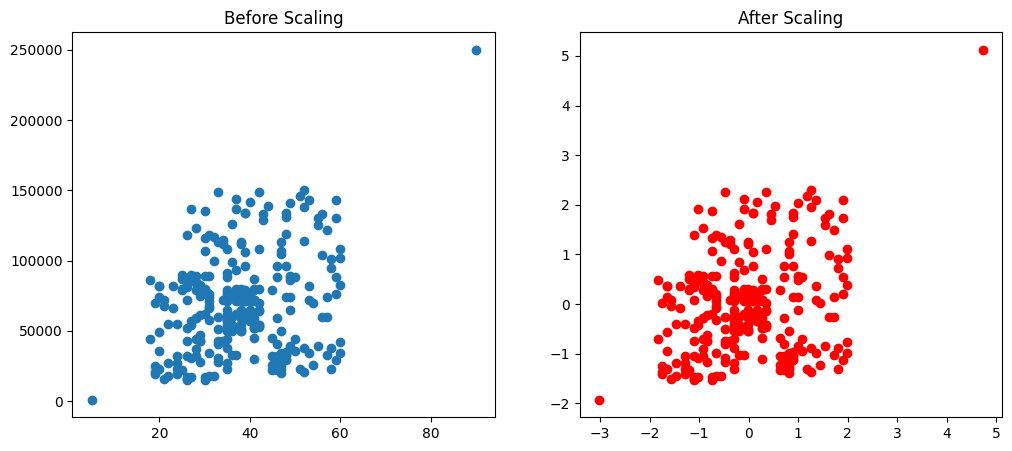

In [37]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train['Age'], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'], X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()

## Normalization

It is a technique often applied as a part of data preperation for machine learning. The goal of normalization is to change the values of numeric columns in the dataset to use a common side, without distorting differences in the ranges of values or losing information.

MinMax scaling

Mean normalization

Max absolute scaling

Robust scaling

##MinMax scaling
Xi' = Xi-Xmin/Xmax-Xmin



In [38]:
dataframe = pd.read_csv('/content/drive/MyDrive/Colabnotebooks/wine_data.csv', header=None,usecols=[0,1,2])
dataframe.columns=['class_label','alcohol','malic_acid']

In [39]:
dataframe

,class_label,alcohol,malic_acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59
...,...,...,...
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59


we can use distplot of seaborn to distribute both the columns

<ipython-input-40-026ca622da42>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['alcohol'])


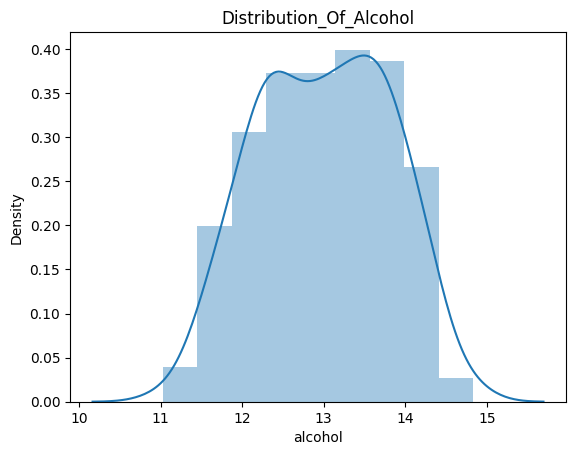

In [40]:
sns.distplot(dataframe['alcohol'])
plt.title('Distribution_Of_Alcohol')
plt.show()

Now the distribution of malic_acid

<ipython-input-41-5c9e9d47dae2>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataframe['malic_acid'])


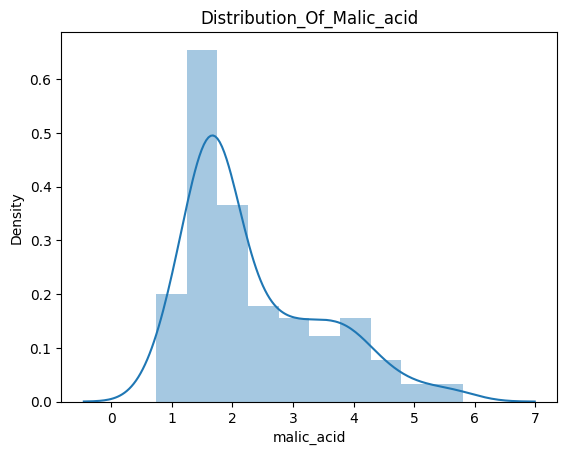

In [41]:
sns.distplot(dataframe['malic_acid'])
plt.title('Distribution_Of_Malic_acid')
plt.show()

scatterplot the data before training so that we can recognize the effects of normalization before and after applying it.

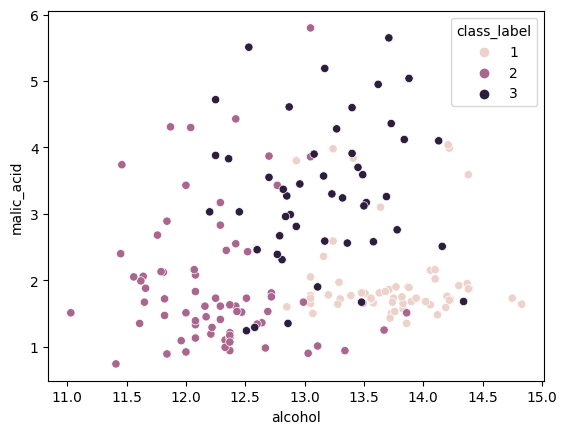

In [42]:
sns.scatterplot(data = dataframe, x='alcohol',y='malic_acid',hue='class_label')
plt.show()

Here you can see that the data is scattered and cannot apply any algorithm that can give effective results so we need to achieve normalization.

In [43]:
#set up the training and test data.
x=dataframe.iloc[:,1:]
y=dataframe['class_label']
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0, test_size=0.2)
x_train.shape,x_test.shape

((142, 2), (36, 2))

In [44]:
#MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
Scaler =MinMaxScaler()
Scaler.fit(x_train)
x_train_scaled = Scaler.transform(x_train)
x_test_scaled = Scaler.transform(x_test)

In [45]:
x_train_scaled = pd.DataFrame(x_train_scaled,columns = x_train.columns)
x_test_scaled = pd.DataFrame(x_test_scaled,columns = x_test.columns)

In [46]:
x_train.describe()

,alcohol,malic_acid
count,142.000000,142.000000
mean,12.984859,2.372606
std,0.807175,1.115360
min,11.030000,0.740000
25%,12.347500,1.602500
50%,13.040000,1.895000
75%,13.637500,3.222500
max,14.750000,5.650000


In [47]:
x_train_scaled.describe()

,alcohol,malic_acid
count,142.000000,142.000000
mean,0.525500,0.332506
std,0.216983,0.227161
min,0.000000,0.000000
25%,0.354167,0.175662
50%,0.540323,0.235234
75%,0.700941,0.505601
max,1.000000,1.000000


plotting to show results before and after scaling using normalization

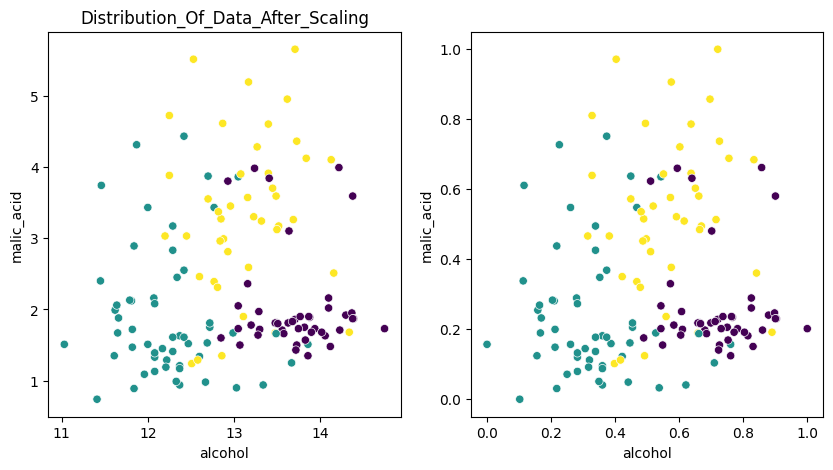

In [48]:
fig, (ax1,ax2) = plt.subplots(ncols=2,figsize=(10,5))

sns.scatterplot(data=x_train,x='alcohol',y='malic_acid',ax=ax1,c=y_train)
ax1.set_title('Distribution_Of_Data_Before_Scaling')

sns.scatterplot(data=x_train_scaled,x='alcohol',y='malic_acid',ax=ax2,c=y_train)
ax1.set_title('Distribution_Of_Data_After_Scaling')

plt.show()

<ipython-input-49-1832f3438a7e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['alcohol'],ax=ax1,hist=False)
<ipython-input-49-1832f3438a7e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['malic_acid'],ax=ax1,hist=False)
<ipython-input-49-1832f3438a7e>:7: Us

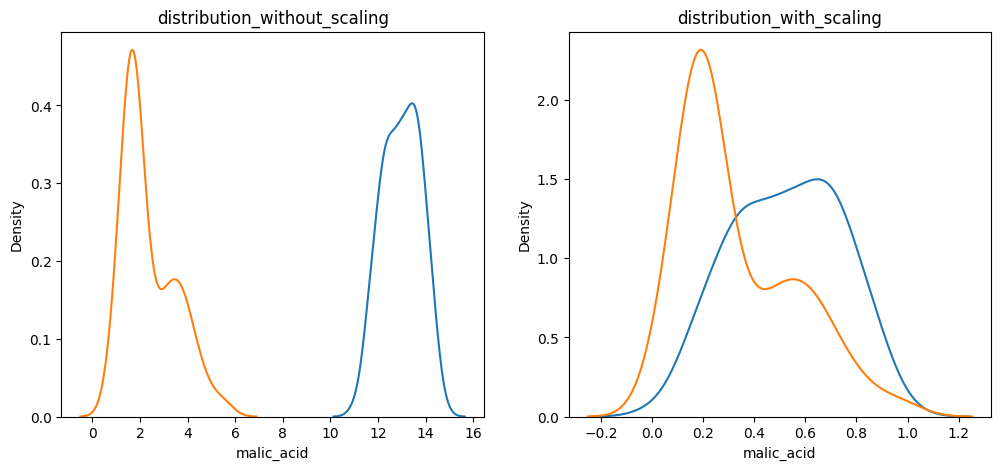

In [49]:
fig,(ax1,ax2) = plt.subplots(ncols=2,figsize=(12,5))

sns.distplot(x_train['alcohol'],ax=ax1,hist=False)
sns.distplot(x_train['malic_acid'],ax=ax1,hist=False)
ax1.set_title('distribution_without_scaling')

sns.distplot(x_train_scaled['alcohol'],ax=ax2,hist=False)
sns.distplot(x_train_scaled['malic_acid'],ax=ax2,hist=False)
ax2.set_title('distribution_with_scaling')

plt.show()

Let's train the model using logistic regression

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [52]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled, y_train)

LogisticRegression()

In [53]:
y_pred=lr.predict(x_test)
y_pred_scaled = lr_scaled.predict(x_test_scaled)

In [54]:
print('accuracy score without scaling',accuracy_score(y_test,y_pred))
print('accuracy score with scaling',accuracy_score(y_test,y_pred_scaled))

accuracy score without scaling 0.7222222222222222
accuracy score with scaling 0.75


In [55]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [56]:
y_pred = dt.predict(x_test)
accuracy_score(y_test,y_pred)

0.8055555555555556